In [164]:
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid

import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants

In [2]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
flies = ['087','089','094','097','098','099','100','101','105']

In [29]:
atlas_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine_zflip_2umiso.nii"
atlas = np.asarray(nib.load(atlas_path).get_data().squeeze(), dtype='float32')
atlas = np.swapaxes(atlas,0,1)
atlas.shape

(146, 314, 91)

In [18]:
all_brains = {}
for behavior in ['dRotLabY', 'dRotLabZneg', 'dRotLabZpos']:
    brains = []
    for fly in flies:
        print(fly)
        brainfile = os.path.join(dataset_path, 'fly_' + fly, 'warp', F'corr_{behavior}-applied-meanbrain.nii')
        brain = np.asarray(nib.load(brainfile).get_data().squeeze(), dtype='float32')
        brains.append(brain)
    brains = np.asarray(brains)
    print(f'{behavior} done')
    all_brains[behavior] = brains

087
089
094
097
098
099
100
101
105
dRotLabY done
087
089
094
097
098
099
100
101
105
dRotLabZneg done
087
089
094
097
098
099
100
101
105
dRotLabZpos done


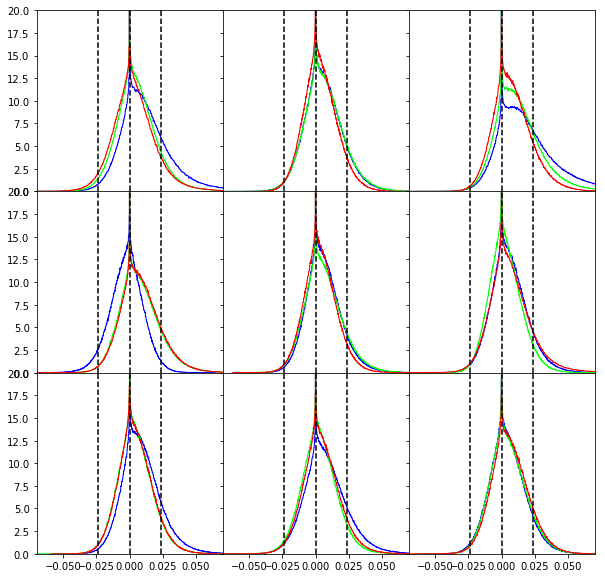

In [188]:
fig = plt.figure(figsize=(10,10))

grid = ImageGrid(fig, 111, nrows_ncols=(3, 3), axes_pad=0,aspect=False)

for fly_num,ax in enumerate(grid):
    ax.hist(all_brains['dRotLabY'][fly_num].flatten(),bins=1000,histtype='step',density=True,color=(0,0,1));
    ax.hist(all_brains['dRotLabZpos'][fly_num].flatten(),bins=1000,histtype='step',density=True,color=(0,1,0));
    ax.hist(all_brains['dRotLabZneg'][fly_num].flatten(),bins=1000,histtype='step',density=True,color=(1,0,0));
    ax.axvline(0,color='k',linestyle='--')
    ax.axvline(-.024,color='k',linestyle='--')
    ax.axvline(.024,color='k',linestyle='--')
    ax.set_ylim(0,20)
    ax.set_xlim(-.07,.07)


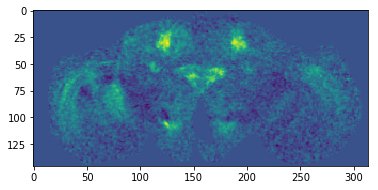

In [155]:
plt.imshow(all_brains['dRotLabY'][0][:,:,35].T)

In [69]:
meanbrains = {}
for behavior in ['dRotLabY', 'dRotLabZpos', 'dRotLabZneg']:
    meanbrains[behavior] = np.mean(all_brains[behavior],axis=0)

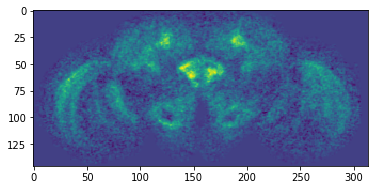

In [125]:
plt.imshow(meanbrains['dRotLabY'][:,:,35].T)

(-0.07, 0.07)

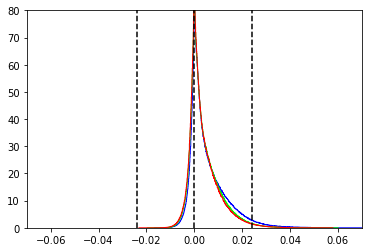

In [194]:
plt.hist(meanbrains['dRotLabY'].flatten(),bins=1000,histtype='step',density=True,color=(0,0,1));
plt.hist(meanbrains['dRotLabZpos'].flatten(),bins=1000,histtype='step',density=True,color=(0,1,0));
plt.hist(meanbrains['dRotLabZneg'].flatten(),bins=1000,histtype='step',density=True,color=(1,0,0));

plt.axvline(0,color='k',linestyle='--')
plt.axvline(-.024,color='k',linestyle='--')
plt.axvline(.024,color='k',linestyle='--')
plt.ylim(0,80)
plt.xlim(-.07,.07)

In [74]:
rgb_corrs = np.stack((meanbrains['dRotLabZneg'], meanbrains['dRotLabZpos'], meanbrains['dRotLabY']))
rgb_corrs = np.swapaxes(rgb_corrs,0,3)
rgb_corrs = np.swapaxes(rgb_corrs,0,2)
rgb_corrs.shape

(146, 314, 91, 3)

In [130]:
### MAKE ALPHA ###
alpha = np.ones(atlas.shape)
alpha[np.where(np.max(rgb_corrs,axis=-1)<0.015)]=0 # Corrs
signals_alpha = np.concatenate((rgb_corrs,alpha[..., np.newaxis]),axis=-1)
signals_alpha.shape

(146, 314, 91, 4)

In [205]:
save_dir ='/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs/20220419_corr_video'
os.mkdir(save_dir)

In [208]:
for i,z in enumerate(np.arange(91)[::-1]):
    print(i,z)
    plt.figure(figsize=(10,10))
    plt.imshow(atlas[:,:,z],cmap='gray')
    plt.imshow(signals_alpha[:,:,z,:]*30)
    plt.axis('off')
    label = format(i, '03d')
    fname = os.path.join(save_dir, f'{label}')
    plt.savefig(fname,dpi=100,bbox_inches='tight')
    plt.clf()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 90


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 89


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 88


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3 87


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4 86


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5 85


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6 84


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7 83


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8 82


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9 81


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10 80


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11 79


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


12 78


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


13 77


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14 76


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15 75


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


16 74


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


17 73


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


18 72


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


19 71


/home/users/brezovec/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


20 70


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


21 69


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


22 68


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


23 67


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


24 66


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


25 65


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


26 64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


27 63


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


28 62


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


29 61


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


30 60


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


31 59


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


32 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33 57


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


34 56


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


35 55


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


36 54


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


37 53


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


38 52


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


39 51


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


40 50


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


41 49


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


42 48


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


43 47


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


44 46


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


45 45


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


46 44


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


47 43


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


48 42


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


49 41


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


50 40


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


51 39


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


52 38


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


53 37


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


54 36


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


55 35


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


56 34


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


57 33


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


58 32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


59 31


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


60 30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


61 29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


62 28


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


63 27


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


64 26


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


65 25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


66 24


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


67 23


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


68 22


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


69 21


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


70 20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


71 19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


72 18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


73 17


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


74 16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


75 15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


76 14


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


77 13


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


78 12


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


79 11


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


80 10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


81 9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


82 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


83 7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


84 6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


85 5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


86 4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


87 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


88 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


89 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


90 0


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [204]:
for z in np.arange(91)[::-1]:
    print(z)

90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
